# A1 title djsn

## Practice instructions

The objective of this activity is to learn how to characterize the structure of complex networks and become familiar with the models used to generate synthetic networks. The activity is composed of two parts:

Part 1. Structural characterization of networks

You can find four different networks labelled as net1, net2, net3 and net4 in the activityA1.zip file.  To characterize their macroscopic structure, the students should analyze (at least) the following network descriptors:

Number of nodes
Number of edges
Minimum, maximum, and average degree
Average clustering coefficient (average of the clustering coefficient of each node)
Assortativity
Average path length (average distance between all pairs of nodes)
Diameter (maximum distance between nodes in the network)
Apart from these indicators, the degree distribution provides crucial information to understand the macroscopic structure of networks. For this reason, the students should obtain the degree distribution of each network and choose its most suitable representation (histogram in linear scale or in histogram in log-log scale with logarithmic binning).

The microscopic structure of the network is instead characterized by analyzing different centralities for the nodes of the network. The students should list the 5 most central nodes according to different metrics (betweenness, degree, eigenvector) and comment the results. Are these centrality indicators providing the same information on the relevance of the nodes for the network?

PS. Visualization of these networks using networkx is discouraged due to their large size.

Part 2. Models

Based on the descriptors of the network and its degree distribution, the students should figure out the model used to generate the network. There are four possibilities: the ER model, the WS model with an intermediate rewiring probability, the BA model or the CM assuming a degree distribution which follows a power-law with $\gamma$<2.5.

To round off the activity, the students should analyze the network net5. This network is generated by a model which has not been explained in our lectures. The students should visualize the network (setting the positions of the nodes from the file ‘positions.txt’) and comment the most prominent features of the network. Is the network connected? Is it scale-free? Is the largest connected component a small-world network? From the visualization of the network, the students should propose an algorithm to generate the network. Hint: The algorithm starts by distributing the nodes randomly across space.

The delivery should include a single .zip file named ‘Groupxxx_SURNAME1_SURNAME2_A1.zip’ containing:

A brief PDF report discussing the results obtained in the two parts of the activity.
A Jupyter notebook with the code needed to reproduce the results.

In [1]:
# Install required packages for this activity
!pip install networkx numpy pandas matplotlib

## Part 1. Structural characterization of networks



In [7]:
import networkx as nx
from pathlib import Path

def _load_netfile(path):
    try:
        g = nx.read_pajek(str(path))
    except Exception:
        g = nx.read_edgelist(str(path))
    return nx.Graph(g)

nets = []
for i in range(1, 6):
    name = f'net{i}'
    try:
        existing = eval(name)
    except NameError:
        existing = None

    if isinstance(existing, (nx.Graph, nx.DiGraph, nx.MultiGraph, nx.MultiDiGraph)):
        print(f"{name} already loaded: {existing.number_of_nodes()} nodes, {existing.number_of_edges()} edges")
        nets.append(existing)
        continue

    path = Path(f'{name}.net')
    if not path.exists():
        print(f"{path} not found. Skipping {name}.")
        nets.append(None)
        continue

    try:
        g = _load_netfile(path)
        print(f"Loaded {name}: {g.number_of_nodes()} nodes, {g.number_of_edges()} edges")
        nets.append(g)
    except Exception as e:
        print(f"Failed to load {name} from {path}: {e}")
        nets.append(None)

# create variables net1..net5 for use in other cells
net1, net2, net3, net4, net5 = nets

del _load_netfile


net1 already loaded: 5000 nodes, 25000 edges
net2 already loaded: 5000 nodes, 24873 edges
net3 already loaded: 5000 nodes, 23508 edges
net4 already loaded: 5000 nodes, 24975 edges
net5 already loaded: 200 nodes, 465 edges


### Macroscopic structure

In [8]:
import networkx as nx

targets = [('net1', net1), ('net2', net2), ('net3', net3), ('net4', net4)]
results = {}

for name, G in targets:
    if G is None:
        print(f"{name}: not loaded")
        results[name] = None
        continue

    n = G.number_of_nodes()
    m = G.number_of_edges()
    degs = [d for _, d in G.degree()]
    deg_min = min(degs) if degs else 0
    deg_max = max(degs) if degs else 0
    deg_avg = sum(degs) / len(degs) if degs else 0.0

    avg_clust = nx.average_clustering(G)

    try:
        assort = nx.degree_assortativity_coefficient(G)
    except Exception:
        assort = float('nan')

    # For average path length and diameter use the largest connected component if graph is disconnected
    if n == 0:
        avg_path = float('nan')
        diam = float('nan')
    elif nx.is_connected(G):
        try:
            avg_path = nx.average_shortest_path_length(G)
            diam = nx.diameter(G)
        except Exception:
            avg_path = float('nan')
            diam = float('nan')
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        H = G.subgraph(largest_cc)
        try:
            avg_path = nx.average_shortest_path_length(H)
            diam = nx.diameter(H)
        except Exception:
            avg_path = float('nan')
            diam = float('nan')

    results[name] = {
        'nodes': n,
        'edges': m,
        'deg_min': deg_min,
        'deg_max': deg_max,
        'deg_avg': deg_avg,
        'avg_clustering': avg_clust,
        'assortativity': assort,
        'average_path_length': avg_path,
        'diameter': diam,
        'largest_cc_size': len(largest_cc) if (n and not nx.is_connected(G)) else n
    }

# Print concise summary
for name, stats in results.items():
    if stats is None:
        continue
    print(f"{name}: nodes={stats['nodes']}, edges={stats['edges']}, "
          f"deg_min={stats['deg_min']}, deg_max={stats['deg_max']}, deg_avg={stats['deg_avg']:.3f}, "
          f"avg_clustering={stats['avg_clustering']:.4f}, assortativity={stats['assortativity']:.4f}, "
          f"avg_path_length={stats['average_path_length']}, diameter={stats['diameter']}, "
          f"largest_cc_size={stats['largest_cc_size']}")

net1: nodes=5000, edges=25000, deg_min=6, deg_max=16, deg_avg=10.000, avg_clustering=0.4141, assortativity=-0.0097, avg_path_length=5.121124624924985, diameter=8, largest_cc_size=5000
net2: nodes=5000, edges=24873, deg_min=1, deg_max=24, deg_avg=9.949, avg_clustering=0.0021, assortativity=-0.0057, avg_path_length=3.956049529905981, diameter=7, largest_cc_size=5000
net3: nodes=5000, edges=23508, deg_min=3, deg_max=732, deg_avg=9.403, avg_clustering=0.0862, assortativity=-0.1339, avg_path_length=3.0082426885377074, diameter=5, largest_cc_size=5000
net4: nodes=5000, edges=24975, deg_min=5, deg_max=210, deg_avg=9.990, avg_clustering=0.0107, assortativity=-0.0325, avg_path_length=3.4868165633126624, diameter=5, largest_cc_size=5000


### Degree distribution

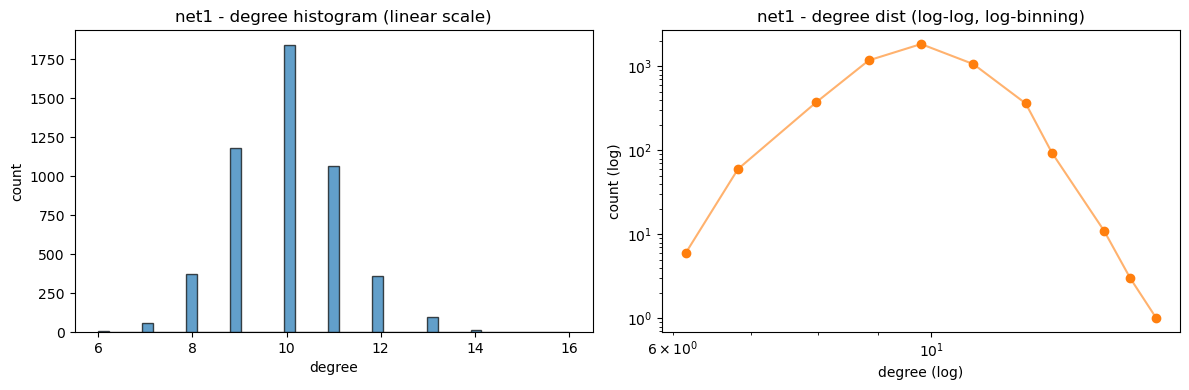

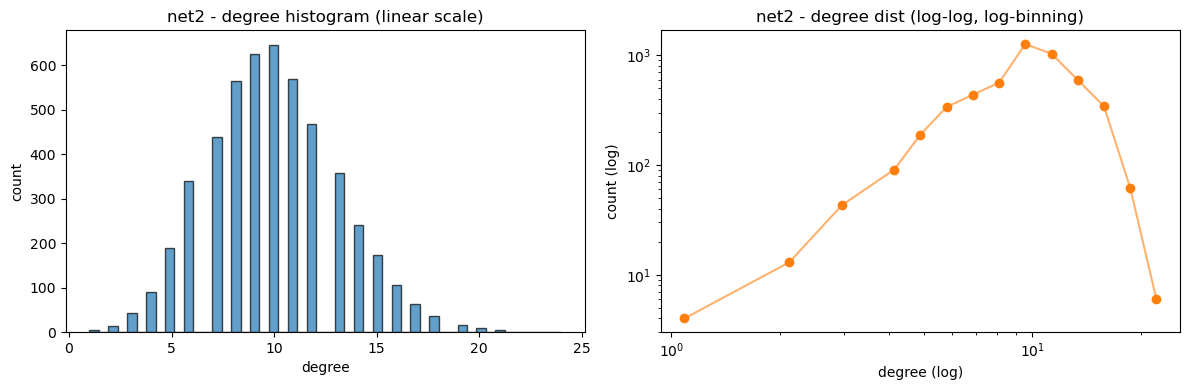

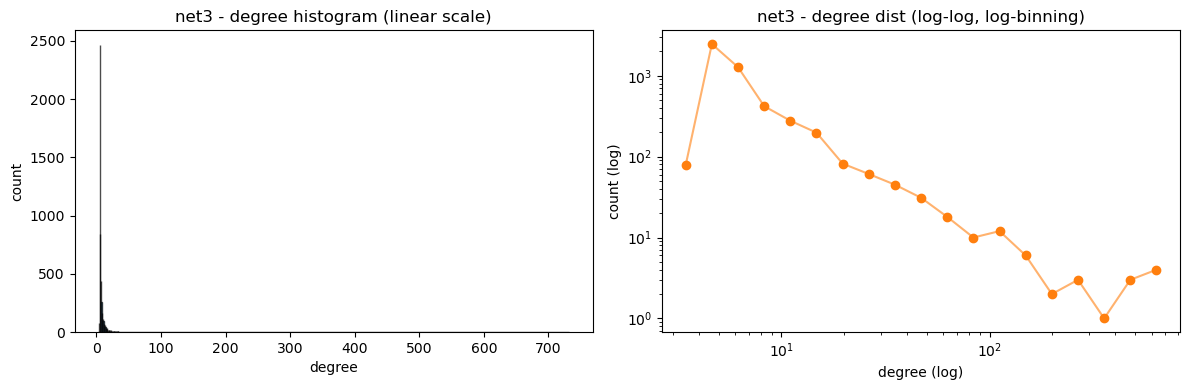

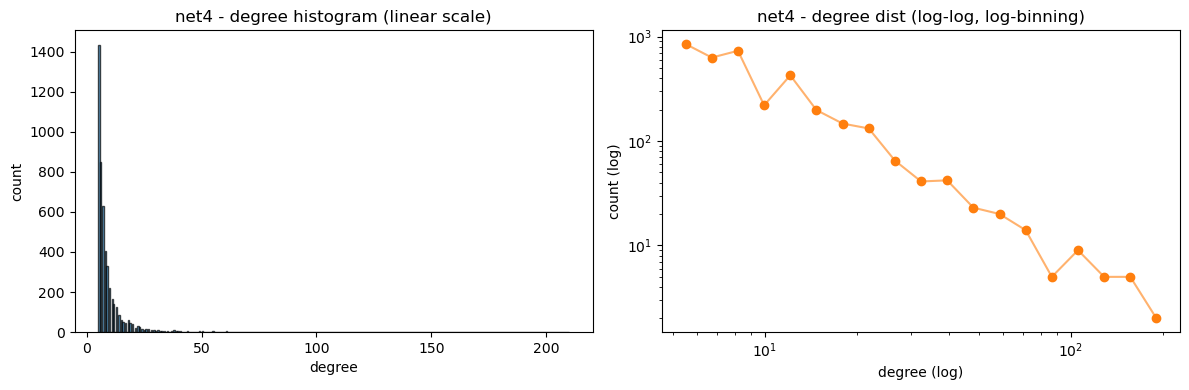

net1: nodes=5000, edges=25000, deg_min=6, deg_max=16, deg_avg=10.000, ratio=2.7, recommended=linear histogram, alpha_est=2.7355416312917065, r2=0.10779972161828333
net2: nodes=5000, edges=24873, deg_min=1, deg_max=24, deg_avg=9.949, ratio=24.0, recommended=linear histogram, alpha_est=-0.9686485571790165, r2=0.19803214550379744
net3: nodes=5000, edges=23508, deg_min=3, deg_max=732, deg_avg=9.403, ratio=244.0, recommended=log-log (log-binning), alpha_est=1.2687607519759738, r2=0.8531911790022024
net4: nodes=5000, edges=24975, deg_min=5, deg_max=210, deg_avg=9.990, ratio=42.0, recommended=log-log (log-binning), alpha_est=1.6941800525564257, r2=0.9765239172439709


In [9]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

targets = [('net1', net1), ('net2', net2), ('net3', net3), ('net4', net4)]

recommendations = {}

for name, G in targets:
    if G is None:
        print(f"{name}: not loaded")
        recommendations[name] = None
        continue

    degs = [d for _, d in G.degree()]
    if len(degs) == 0:
        print(f"{name}: no nodes")
        recommendations[name] = None
        continue

    deg_min = max(1, min(degs))  # ensure >=1 for log-binning
    deg_max = max(degs)
    ratio = deg_max / deg_min if deg_min > 0 else np.inf

    # Linear histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(degs, bins='auto', color='C0', edgecolor='k', alpha=0.7)
    axes[0].set_title(f"{name} - degree histogram (linear scale)")
    axes[0].set_xlabel("degree")
    axes[0].set_ylabel("count")

    # Log-log histogram with logarithmic binning
    nbins = 20
    bins = np.logspace(np.log10(deg_min), np.log10(max(deg_max, deg_min + 1)), nbins)
    counts, edges = np.histogram(degs, bins=bins)
    # compute bin centers as geometric mean
    centers = np.sqrt(edges[:-1] * edges[1:])

    # Plot on log-log
    ax = axes[1]
    nonzero = counts > 0
    ax.scatter(centers[nonzero], counts[nonzero], color='C1')
    ax.plot(centers[nonzero], counts[nonzero], linestyle='-', color='C1', alpha=0.6)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("degree (log)")
    ax.set_ylabel("count (log)")
    ax.set_title(f"{name} - degree dist (log-log, log-binning)")

    plt.tight_layout()
    plt.show()

    # Try a simple power-law fit on the log-binned nonzero bins
    if nonzero.sum() >= 3:
        x = np.log10(centers[nonzero])
        y = np.log10(counts[nonzero])
        coeffs = np.polyfit(x, y, 1)
        slope, intercept = coeffs[0], coeffs[1]
        # compute R^2
        y_pred = np.polyval(coeffs, x)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot if ss_tot > 0 else 0.0
        alpha = -slope  # power-law p(k) ~ k^{-alpha}
    else:
        slope = intercept = r2 = np.nan
        alpha = np.nan

    # Heuristic recommendation: use log-log if heavy tail (ratio large) and fit is decent
    use_log = (ratio >= 50 and not np.isnan(r2) and r2 >= 0.7) or (r2 >= 0.85)
    recommended = "log-log (log-binning)" if use_log else "linear histogram"

    recommendations[name] = {
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "deg_min": min(degs),
        "deg_max": max(degs),
        "deg_avg": sum(degs) / len(degs),
        "ratio_max_min": ratio,
        "power_law_alpha_est": float(alpha) if not np.isnan(alpha) else None,
        "power_law_r2": float(r2) if not np.isnan(r2) else None,
        "recommended_representation": recommended
    }

# Print concise summary
for name, rec in recommendations.items():
    if rec is None:
        continue
    print(f"{name}: nodes={rec['nodes']}, edges={rec['edges']}, "
          f"deg_min={rec['deg_min']}, deg_max={rec['deg_max']}, deg_avg={rec['deg_avg']:.3f}, "
          f"ratio={rec['ratio_max_min']:.1f}, recommended={rec['recommended_representation']}, "
          f"alpha_est={rec['power_law_alpha_est']}, r2={rec['power_law_r2']}")

### Microscopic structure

In [6]:
import math
import numpy as _np

# Analyze microscopic structure: top-5 nodes by betweenness, degree, eigenvector centralities
# Uses existing variables/networks (net1..net4) and previously imported numpy/matplotlib/networkx.

targets = [('net1', net1), ('net2', net2), ('net3', net3), ('net4', net4)]
top_k = 5

def _top_k_from_dict(d, k=5):
	items = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
	return items[:k]

for name, G in targets:
	print(f"\n{name}:")
	if G is None:
		print("  not loaded")
		continue
	n = G.number_of_nodes()
	print(f"  nodes={n}, edges={G.number_of_edges()}")

	# Degree (raw)
	deg_dict = dict(G.degree())
	top_deg = _top_k_from_dict(deg_dict, top_k)

	# Degree centrality (normalized) -- gives comparable scale with others
	degc = nx.degree_centrality(G)
	# Betweenness centrality (exact for small graphs, approximate for large)
	if n > 2000:
		k = min(500, max(50, int(0.01 * n)))  # sample size for approximation
		print(f"  computing approximate betweenness (k={k}) ...")
		bet = nx.betweenness_centrality(G, k=k, seed=42, normalized=True)
	else:
		print("  computing exact betweenness ...")
		bet = nx.betweenness_centrality(G, normalized=True)

	top_bet = _top_k_from_dict(bet, top_k)

	# Eigenvector centrality: compute on largest connected component then project back
	if nx.is_connected(G):
		comp_for_eig = G
	else:
		largest_cc = max(nx.connected_components(G), key=len)
		comp_for_eig = G.subgraph(largest_cc)
		print(f"  graph disconnected: eigenvector computed on largest CC (size={comp_for_eig.number_of_nodes()})")

	try:
		# try power method (may be faster/robust)
		eig_c = nx.eigenvector_centrality(comp_for_eig, max_iter=1000, tol=1e-06)
		# Map back to full graph: nodes outside CC get 0
		eig = {nnode: eig_c.get(nnode, 0.0) for nnode in G.nodes()}
		top_eig = _top_k_from_dict(eig, top_k)
	except Exception as e:
		print(f"  eigenvector centrality failed: {e}")
		eig = {nnode: 0.0 for nnode in G.nodes()}
		top_eig = []

	# Print top-5 lists
	print("  Top-5 by degree (node, degree):")
	for node, val in top_deg:
		print(f"    {node}: {val}")

	print("  Top-5 by betweenness (node, centrality):")
	for node, val in top_bet:
		print(f"    {node}: {val:.6f}")

	print("  Top-5 by eigenvector (node, centrality):")
	for node, val in top_eig:
		print(f"    {node}: {val:.6f}")

	# Compare overlaps and simple rank correlations
	deg_top_nodes = {n for n, _ in top_deg}
	bet_top_nodes = {n for n, _ in top_bet}
	eig_top_nodes = {n for n, _ in top_eig}

	def jaccard(a, b):
		if not a and not b:
			return 1.0
		inter = len(a & b)
		uni = len(a | b)
		return inter / uni if uni > 0 else 0.0

	print("  Overlaps (counts):")
	print(f"    degree ∩ betweenness: {len(deg_top_nodes & bet_top_nodes)} (Jaccard={jaccard(deg_top_nodes, bet_top_nodes):.2f})")
	print(f"    degree ∩ eigenvector: {len(deg_top_nodes & eig_top_nodes)} (Jaccard={jaccard(deg_top_nodes, eig_top_nodes):.2f})")
	print(f"    betweenness ∩ eigenvector: {len(bet_top_nodes & eig_top_nodes)} (Jaccard={jaccard(bet_top_nodes, eig_top_nodes):.2f})")

	# Simple rank correlation (Spearman-like) using integer ranks (ties handled arbitrarily)
	def _ranks_from_scores(score_dict):
		# higher score -> better rank (0 best). Return array aligned to nodes list.
		items = sorted(score_dict.items(), key=lambda kv: kv[1], reverse=True)
		ranks = {}
		for i, (node, _) in enumerate(items):
			ranks[node] = i
		return ranks

	ranks_deg = _ranks_from_scores(degc)
	ranks_bet = _ranks_from_scores(bet)
	ranks_eig = _ranks_from_scores(eig)

	# build aligned arrays
	nodes_list = list(G.nodes())
	arr_deg = _np.array([ranks_deg[n] for n in nodes_list], dtype=float)
	arr_bet = _np.array([ranks_bet[n] for n in nodes_list], dtype=float)
	arr_eig = _np.array([ranks_eig[n] for n in nodes_list], dtype=float)

	def rank_corr(a, b):
		if a.size == 0 or b.size == 0:
			return float('nan')
		# convert to zero-mean and compute Pearson
		a_mean = a.mean()
		b_mean = b.mean()
		denom = (a - a_mean).std() * (b - b_mean).std()
		if denom == 0:
			return float('nan')
		return float(_np.corrcoef(a, b)[0, 1])

	print("  Rank-correlation (approx Spearman via integer ranks):")
	print(f"    degree vs betweenness: {rank_corr(arr_deg, arr_bet):.3f}")
	print(f"    degree vs eigenvector: {rank_corr(arr_deg, arr_eig):.3f}")
	print(f"    betweenness vs eigenvector: {rank_corr(arr_bet, arr_eig):.3f}")

	# Short guidance for interpretation
	print("  Interpretation hint:")
	print("    - Degree highlights local hubs (many neighbors).")
	print("    - Betweenness highlights nodes on many shortest paths (bridges, bottlenecks).")
	print("    - Eigenvector highlights nodes connected to other well-connected nodes (global importance).")
	print("    These measures can agree for some nodes (high-degree hubs often have high eigenvector),")
	print("    but can differ substantially: e.g., a node bridging communities may have high betweenness but moderate degree/eigenvector.")


net1:
  nodes=5000, edges=25000
  computing approximate betweenness (k=50) ...
  Top-5 by degree (node, degree):
    1693: 16
    651: 15
    1579: 15
    4891: 15
    41: 14
  Top-5 by betweenness (node, centrality):
    1795: 0.010831
    4469: 0.008214
    1808: 0.007760
    4463: 0.007721
    3604: 0.007424
  Top-5 by eigenvector (node, centrality):
    651: 0.028634
    1937: 0.026475
    4526: 0.025633
    4398: 0.025253
    1939: 0.025169
  Overlaps (counts):
    degree ∩ betweenness: 0 (Jaccard=0.00)
    degree ∩ eigenvector: 1 (Jaccard=0.11)
    betweenness ∩ eigenvector: 0 (Jaccard=0.00)
  Rank-correlation (approx Spearman via integer ranks):
    degree vs betweenness: 0.445
    degree vs eigenvector: 0.687
    betweenness vs eigenvector: 0.371
  Interpretation hint:
    - Degree highlights local hubs (many neighbors).
    - Betweenness highlights nodes on many shortest paths (bridges, bottlenecks).
    - Eigenvector highlights nodes connected to other well-connected nodes (

## Part 2. Models

In [ ]:
import networkx as nx
import numpy as np
from collections import defaultdict
import math

def infer_model_robust(G, rec=None):
    """
    Robust classifier to infer the generation model directly from a NetworkX graph (G), 
    using structural properties like C(k) decay, relative clustering, and heterogeneity.
    
    The function now returns the predicted model name and a dictionary of 
    estimated creation parameters.

    Inputs:
      - G: A networkx.Graph object (the full network data).
      - rec: optional dict from degree-distribution analysis with keys
             'ratio_max_min', 'power_law_r2', 'recommended_representation',
             and 'power_law_alpha_est'.
             
    Returns: tuple (model_name: str, params: dict).
    """
    if not isinstance(G, nx.Graph):
        return ('Error: Input G must be a networkx.Graph object.', {})

    # --- 1. Core Structural Metric Calculation ---
    n = G.number_of_nodes()
    degrees = dict(G.degree())
    deg_avg = sum(degrees.values()) / n
    avg_clust = nx.average_clustering(G)
    
    # Calculate Average Path Length (L) for connected components
    try:
        avg_path = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # If disconnected, L is very large (treat as large path length)
        avg_path = n 

    # ER Baseline: Expected clustering for a random graph with the same N and <k>
    expected_clust_er = deg_avg / max(1, n - 1)
    
    # Extract degree analysis metrics
    r2 = rec.get('power_law_r2', 0.0) if rec else 0.0
    recommended = rec.get('recommended_representation', '') if rec else ''
    alpha = rec.get('power_law_alpha_est', None) if rec else None
    
    # Calculate degree range ratio if not provided
    ratio = rec.get('ratio_max_min', None) if rec else None
    deg_range_ratio = ratio
    if deg_range_ratio is None and deg_avg and deg_avg > 0:
        deg_range_ratio = max(degrees.values()) / max(1.0, deg_avg)


    # --- 2. Parameter Estimation (Pre-calculation) ---

    # ER Parameter (p): Estimated using p = <k> / (N - 1)
    p_er_est = expected_clust_er 

    # BA Parameter (m): Estimated using m = <k> / 2 (edges added by each new node)
    m_ba_est = round(deg_avg / 2)
    m_ba_est = max(1, m_ba_est) 

    # WS Parameters (k, beta)
    # k is the initial mean degree of the lattice, k is approx <k>
    k_ws_est = round(deg_avg)
    k_ws_est = max(4, k_ws_est) 

    # Theoretical max clustering for a ring lattice (beta=0) with k_ws_est
    c_max_ws = 3 * (k_ws_est - 2) / (4 * (k_ws_est - 1)) if k_ws_est > 2 else 0
    
    # Estimate beta (rewiring probability) based on observed vs max clustering
    if c_max_ws > 0:
        # Heuristic estimation relating C_obs/C_max to beta
        beta_raw = 1.0 - (avg_clust / c_max_ws)
        beta_ws_est = max(0.001, min(0.999, beta_raw**2))
    else:
        beta_ws_est = 0.5


    # --- 3. Scale-Free Check (Heterogeneity) ---
    # R2 >= 0.75 and log-log plot confirm power-law distribution.
    is_scale_free = (r2 >= 0.75) and (recommended == 'log-log (log-binning)')
    
    if is_scale_free:
        # CM Parameter: The power-law exponent (gamma)
        gamma_cm_est = alpha if alpha is not None else 'N/A'
        
        # Calculate C(k) trend: Compare clustering of low-degree nodes vs high-degree nodes.
        degrees_list = sorted(degrees.values())
        high_degree_threshold = degrees_list[int(n * 0.9)] 
        
        clust_k = nx.clustering(G)
        c_hubs = []
        c_non_hubs = []
        
        for node, degree in degrees.items():
            if degree >= high_degree_threshold:
                c_hubs.append(clust_k[node])
            else:
                c_non_hubs.append(clust_k[node])
        
        avg_c_hubs = np.mean(c_hubs) if c_hubs else 0
        avg_c_non_hubs = np.mean(c_non_hubs) if c_non_hubs else 0
        
        # CRITERION FOR BA: Decaying C(k). Hubs must be clustered less than 75% of non-hubs 
        # (This indicates the structural lack of local triangles characteristic of BA).
        if (avg_c_non_hubs > 0.01) and (avg_c_hubs / avg_c_non_hubs < 0.75): 
            return 'Barabasi-Albert (BA)', {'m_edges_per_step': m_ba_est, 'N_nodes': n, 'alpha_exponent': gamma_cm_est}
        else:
            # High or non-decaying clustering: Configuration Model (CM)
            return 'Configuration Model (CM)', {'gamma_exponent': gamma_cm_est, 'N_nodes': n}

    # --- 4. Homogeneous Check (ER vs. WS) ---
    # High Clustering Test: Must be > 50x ER baseline (or significant absolute value)
    is_high_clustering = (avg_clust > 50 * expected_clust_er)
    # Short Path Length Test: L must be short (e.g., L < sqrt(N) proxy)
    is_short_path = avg_path < np.sqrt(n) 
    
    if is_high_clustering and is_short_path:
        return 'Watts-Strogatz (WS)', {'k_mean_degree': k_ws_est, 'beta_rewiring_prob': round(beta_ws_est, 3), 'N_nodes': n}
    
    # If not Scale-Free and not Watts-Strogatz, it defaults to ER (low clustering, short path).
    if is_short_path and (avg_clust < 5 * expected_clust_er):
        return 'Erdos-Renyi (ER)', {'p_edge_probability': round(p_er_est, 5), 'N_nodes': n}

    # --- 5. Fallback ---
    return 'Unknown / ambiguous', {'avg_degree': deg_avg, 'avg_clustering': avg_clust}

# Note: The test loop relies on the 'results' and 'recommendations' dicts which are 
# not defined in this file. To run this, you would load G and define rec.

# Example usage (requires G to be loaded/created):
# # G_net4 = nx.barabasi_albert_graph(5000, 5) 
# # rec_net4 = {'power_law_r2': 0.98, 'recommended_representation': 'log-log (log-binning)', 'power_law_alpha_est': 3.0}
# # model, params = infer_model_robust(G_net4, rec_net4)
# # print(f"Predicted Model: {model}, Parameters: {params}")


#### Testing the infer model functions (change number to test which is better)

In [ ]:
# Run infer_model_robust on net1..net4 using existing `recommendations`
results_pred = {}
for name in ['net1', 'net2', 'net3', 'net4']:
    G = globals().get(name)
    rec = recommendations.get(name) if 'recommendations' in globals() else None

    if G is None:
        print(f"{name}: not loaded")
        results_pred[name] = None
        continue

    try:
        pred = infer_model_robust(G, rec)
    except Exception as e:
        pred = f"Error: {e}"
    print(f"{name}: predicted model -> {pred}")
    results_pred[name] = pred

results_pred

net1: predicted model -> ('Watts-Strogatz (WS)', {'k_mean_degree': 10, 'beta_rewiring_prob': 0.144, 'N_nodes': 5000})
net2: predicted model -> ('Erdos-Renyi (ER)', {'p_edge_probability': 0.00199, 'N_nodes': 5000})
net3: predicted model -> ('Configuration Model (CM)', {'gamma_exponent': 1.2687607519759738, 'N_nodes': 5000})
net4: predicted model -> ('Barabasi-Albert (BA)', {'m_edges_per_step': 5, 'N_nodes': 5000, 'alpha_exponent': 1.6941800525564257})


{'net1': ('Watts-Strogatz (WS)',
  {'k_mean_degree': 10, 'beta_rewiring_prob': 0.144, 'N_nodes': 5000}),
 'net2': ('Erdos-Renyi (ER)',
  {'p_edge_probability': 0.00199, 'N_nodes': 5000}),
 'net3': ('Configuration Model (CM)',
  {'gamma_exponent': 1.2687607519759738, 'N_nodes': 5000}),
 'net4': ('Barabasi-Albert (BA)',
  {'m_edges_per_step': 5,
   'N_nodes': 5000,
   'alpha_exponent': 1.6941800525564257})}

### Net5 analysis

To round off the activity, the students should analyze the network net5. This network is generated by a model which has not been explained in our lectures. The students should visualize the network (setting the positions of the nodes from the file ‘positions.txt’) and comment the most prominent features of the network. Is the network connected? Is it scale-free? Is the largest connected component a small-world network? From the visualization of the network, the students should propose an algorithm to generate the network. Hint: The algorithm starts by distributing the nodes randomly across space.